In [1]:
# Step 1: Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 2: Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # taking only the first two features for easy visualization
y = iris.target

# Step 3: Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Implement an SVM classifier and train it
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


Accuracy: 80.00%


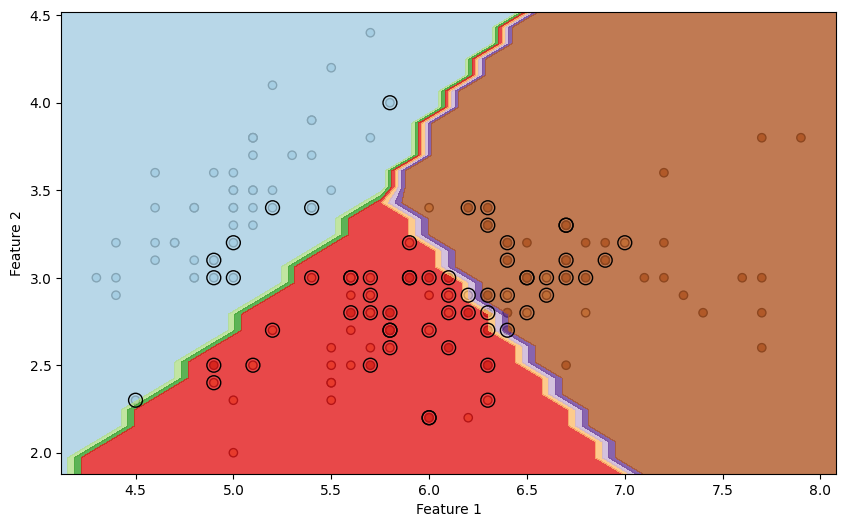

In [3]:
# Step 5: Evaluate the Classifier
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

# Step 6: Visualize the decision boundaries
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
xlim = plt.xlim()
ylim = plt.ylim()

# Create a grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy)

# For multiclass SVM, get the class with the maximum decision function value for each point
Z = np.argmax(Z, axis=1).reshape(XX.shape)

# plot contours
plt.contourf(XX, YY, Z, alpha=0.8, cmap=plt.cm.Paired)

# plot support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
plt.show()
